<a href="https://colab.research.google.com/github/ThomasDarrieumerlou/Forecasting-project/blob/main/Forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [164]:
atlanta_data = pd.read_excel('Atlanta.xlsx')
#atlanta_data = df[df['City, State'] == 'Atlanta, GA']

# Afficher les données liées à Atlanta
atlanta_data

,Year,index_nsa,"City, State",Population,Violent Crimes,Homicides,Rapes,Assaults,Robberies
0,1975,41.080000,"Atlanta, GA",490584,8033,185,443,3518,3887
1,1976,40.742500,"Atlanta, GA",457300,7529,154,477,3518,3380
2,1977,42.482500,"Atlanta, GA",440300,7595,138,510,3593,3354
3,1978,45.897500,"Atlanta, GA",456000,8845,144,592,3990,4119
4,1979,50.840000,"Atlanta, GA",423103,10715,231,656,4639,5189
5,1980,56.942500,"Atlanta, GA",422474,11075,201,671,5470,4733
6,1981,61.112500,"Atlanta, GA",435626,10608,181,644,5246,4537
7,1982,64.932500,"Atlanta, GA",441103,10486,152,613,5722,3999
8,1983,67.547500,"Atlanta, GA",448635,9326,141,619,5014,3552
9,1984,71.657500,"Atlanta, GA",442951,10525,135,632,5729,4029


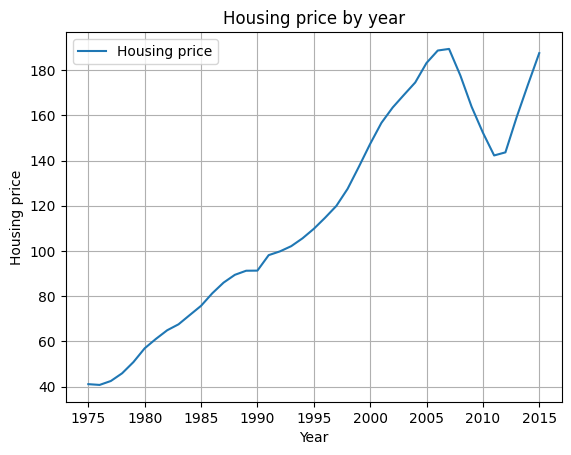

In [121]:
atlanta_data.plot(x='Year', y='index_nsa', label='Housing price')

plt.title('Housing price by year')
plt.xlabel('Year')
plt.ylabel('Housing price')
plt.legend()
plt.grid()
plt.show()

In [122]:
ad_fuller_result = adfuller(atlanta_data['index_nsa'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 1.575933257874712
p-value: 0.9977835468996378


In [123]:
index_diff = np.diff(atlanta_data['index_nsa'], n=1)

ad_fuller_result = adfuller(index_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -3.5958732220236365
p-value: 0.00584041476850811


In [124]:
index_diff2 = np.diff(index_diff, n=1)

ad_fuller_result = adfuller(index_diff2)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -4.2651968960700914
p-value: 0.0005100643153057467


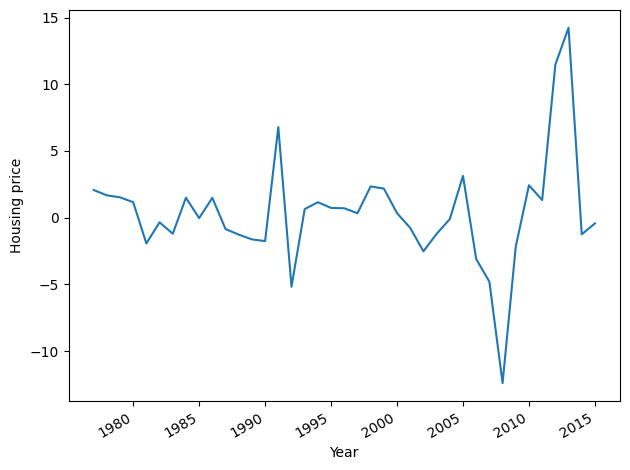

In [125]:
fig, ax = plt.subplots()

ax.plot(atlanta_data['Year'][2:], index_diff2)
ax.set_xlabel('Year')
ax.set_ylabel('Housing price')

fig.autofmt_xdate()
plt.tight_layout()

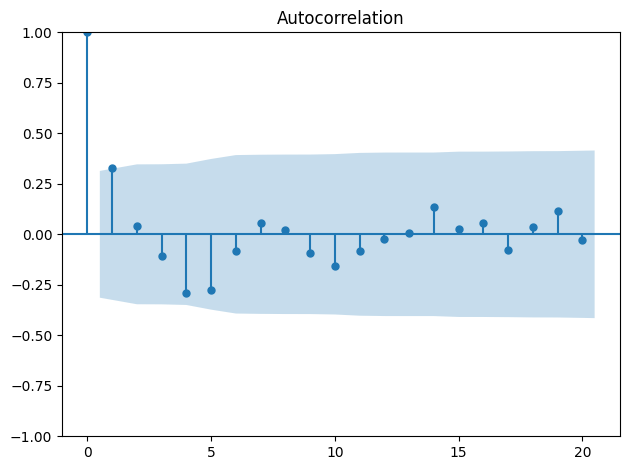

In [126]:
plot_acf(index_diff2, lags=20);
plt.tight_layout()

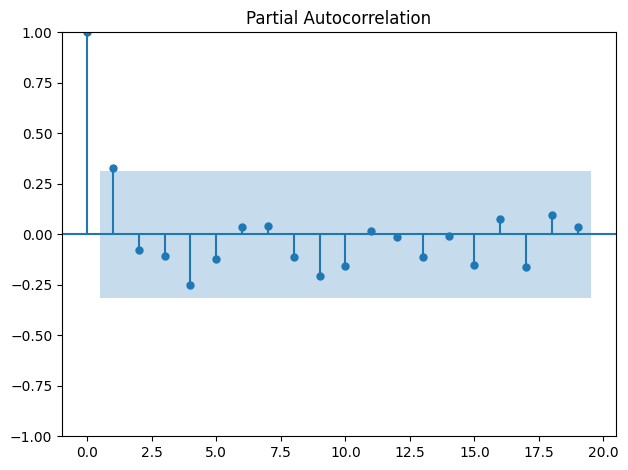

In [127]:
plot_pacf(index_diff2, lags=19);
plt.tight_layout()

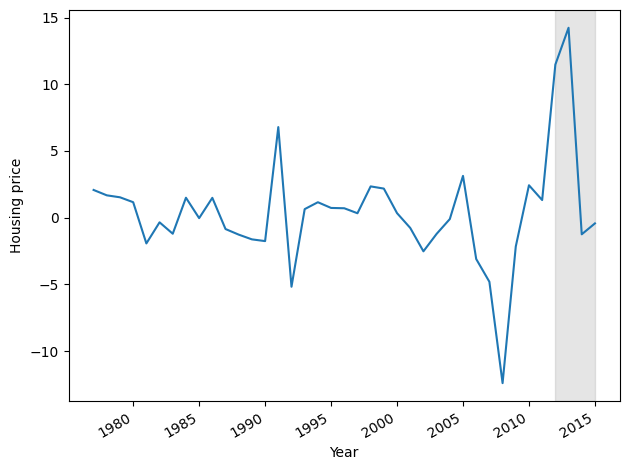

In [128]:
fig, ax = plt.subplots()

ax.plot(atlanta_data['Year'][2:], index_diff2)
ax.set_xlabel('Year')
ax.set_ylabel('Housing price')
ax.axvspan(2012, 2015, color='#808080', alpha=0.2)


fig.autofmt_xdate()
plt.tight_layout()

In [129]:
def optimize_ARIMA(training_data, order_list, d) -> pd.DataFrame:

    results = []

    for order in tqdm_notebook(order_list):
        try:
            model = SARIMAX(training_data, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
        except:
            continue

        aic = model.aic
        bic= model.bic
        results.append([order, aic, bic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC','BIC']

    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [233]:
ps = range(0, 4, 1)
qs = range(0, 4, 1)
d = 2

order_list = list(product(ps, qs))
order_list

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3)]

In [234]:
order_list

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3)]

In [235]:
train = atlanta_data['index_nsa'][:-4]

result_df = optimize_ARIMA(train, order_list, d)
result_df

  0%|          | 0/16 [00:00<?, ?it/s]

,"(p,q)",AIC,BIC
0,"(0, 0)",180.091455,181.646803
1,"(1, 0)",180.853048,183.963744
2,"(0, 1)",180.936452,184.047148
3,"(0, 2)",182.465844,187.131888
4,"(2, 0)",182.841103,187.507148
5,"(1, 1)",182.849581,187.515625
6,"(0, 3)",182.912059,189.133451
7,"(3, 0)",182.963042,189.184434
8,"(1, 2)",183.979073,190.200466
9,"(1, 3)",184.535934,192.312674


In [268]:
model = SARIMAX(train, order=(0,2,0), simple_differencing=False)
model_fit = model.fit(disp=False)

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              index_nsa   No. Observations:                   37
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 -89.046
Date:                Wed, 27 Mar 2024   AIC                            180.091
Time:                        23:11:38   BIC                            181.647
Sample:                             0   HQIC                           180.628
                                 - 37                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         9.4919      1.154      8.224      0.000       7.230      11.754
Ljung-Box (L1) (Q):                   1.20   Jarque-Bera (JB):                54.19
Prob(Q):                              0.27   Pr

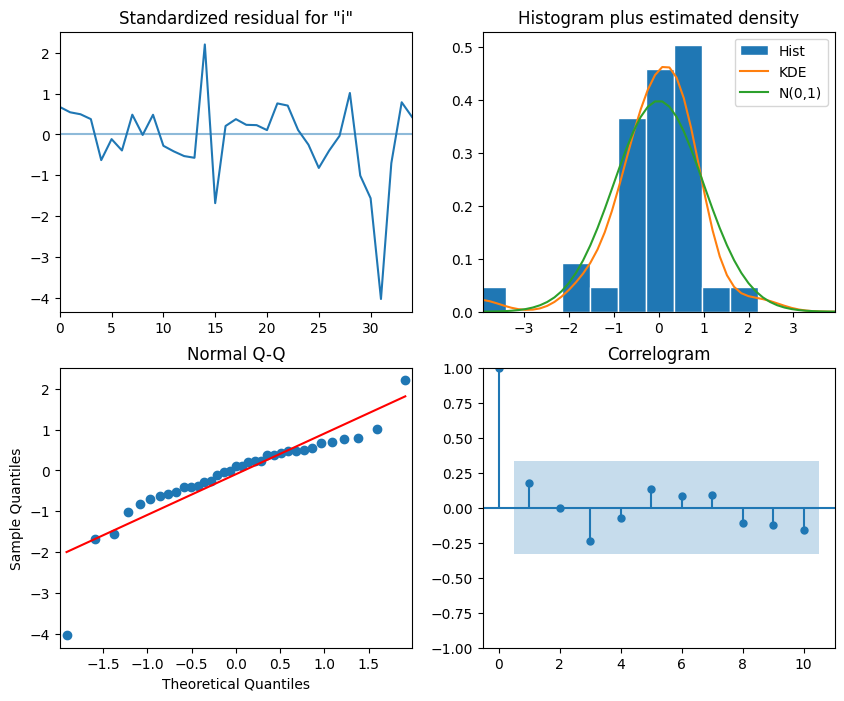

In [269]:
model_fit.plot_diagnostics(figsize=(10,8));

In [270]:
from statsmodels.stats.diagnostic import acorr_ljungbox


residuals = model_fit.resid


acorr_ljungbox(residuals, np.arange(1, 11, 1))

,lb_stat,lb_pvalue
1,4.588429,0.032189
2,4.612030,0.099658
3,4.620041,0.201830
4,4.622192,0.328304
5,4.751558,0.446946
6,4.768176,0.573871
7,4.780386,0.686743
8,4.893943,0.768849
9,4.896959,0.843196
10,4.966526,0.893403


In [271]:
test = atlanta_data.iloc[-5:]

test['naive_seasonal'] = atlanta_data['index_nsa'].iloc[35:40].values
test

,Year,index_nsa,"City, State",Population,Violent Crimes,Homicides,Rapes,Assaults,Robberies,naive_seasonal
36,2011,142.248125,"Atlanta, GA",425533,6097,88,148,3518,2343,152.363750
37,2012,143.613125,"Atlanta, GA",437041,6027,83,113,3555,2276,142.248125
38,2013,159.219375,"Atlanta, GA",451020,5516,83,105,2965,2363,143.613125
39,2014,173.577500,"Atlanta, GA",454363,5577,93,151,3004,2329,159.219375
40,2015,187.505000,"Atlanta, GA",464710,5203,94,170,2944,1995,173.577500


In [273]:
ARIMA_pred = model_fit.get_prediction(35, 40).predicted_mean

test['ARIMA_pred'] = ARIMA_pred
test

,Year,index_nsa,"City, State",Population,Violent Crimes,Homicides,Rapes,Assaults,Robberies,naive_seasonal,ARIMA_pred
36,2011,142.248125,"Atlanta, GA",425533,6097,88,148,3518,2343,152.363750,140.927500
37,2012,143.613125,"Atlanta, GA",437041,6027,83,113,3555,2276,142.248125,132.132500
38,2013,159.219375,"Atlanta, GA",451020,5516,83,105,2965,2363,143.613125,122.016875
39,2014,173.577500,"Atlanta, GA",454363,5577,93,151,3004,2329,159.219375,111.901250
40,2015,187.505000,"Atlanta, GA",464710,5203,94,170,2944,1995,173.577500,101.785625


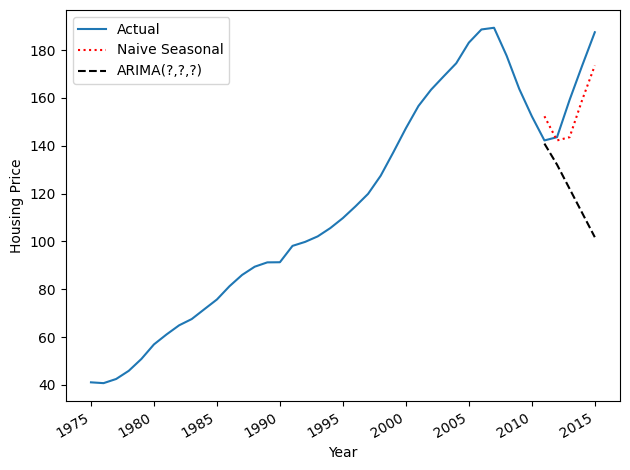

In [274]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(atlanta_data['Year'], atlanta_data['index_nsa'], label='Actual')
ax.plot(test['Year'], test['naive_seasonal'], 'r:', label='Naive Seasonal')
ax.plot(test['Year'], test['ARIMA_pred'], 'k--', label='ARIMA(?,?,?)')

ax.set_xlabel('Year')
ax.set_ylabel('Housing Price')

ax.legend(loc='upper left')

fig.autofmt_xdate()
plt.tight_layout()
plt.show()



In [275]:
from sklearn.metrics import mean_absolute_percentage_error as mape

mape_naive_seasonal = mape(test['index_nsa'], test['naive_seasonal'])*100
mape_ARIMA = mape(test['index_nsa'], test['ARIMA_pred'])*100

print('MAPE Naive:',"%.2f" % (mape_naive_seasonal),'%')
print('MAPE ARIMA:',"%.2f" % (mape_ARIMA),'%')

MAPE Naive: 6.71 %
MAPE ARIMA: 22.71 %


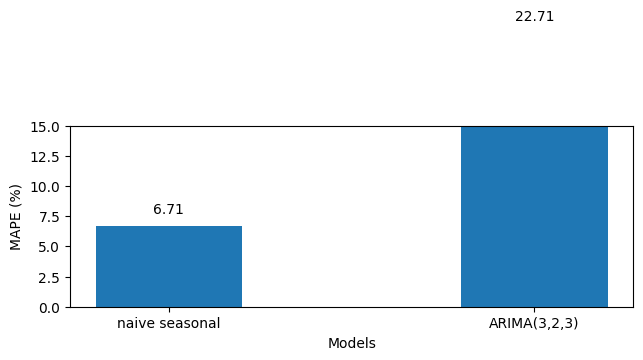

In [276]:
fig, ax = plt.subplots()

x = ['naive seasonal', 'ARIMA(3,2,3)']
y = [mape_naive_seasonal, mape_ARIMA]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 15)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(round(value,2)), ha='center')

plt.tight_layout()

==================================================

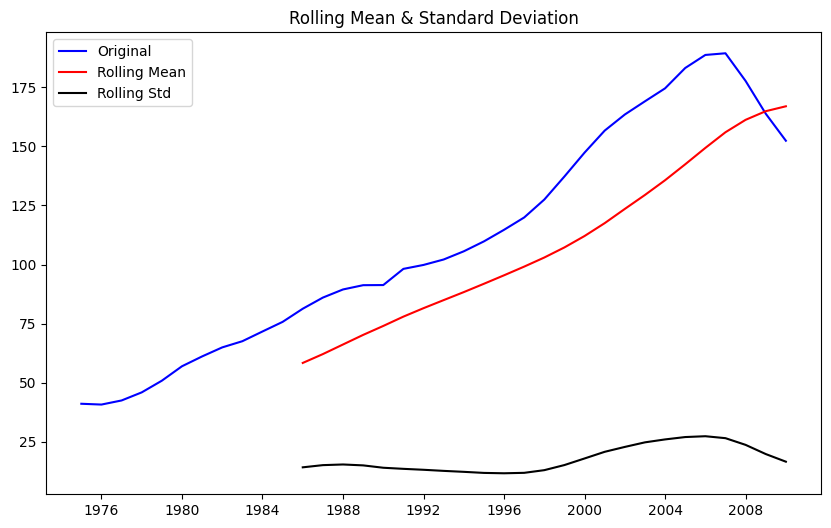

Résultats du test de Dickey-Fuller :
Test Statistic                  0.366270
p-value                         0.980189
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


LinAlgError: Schur decomposition solver error.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import adfuller

# Charger les données
data = pd.read_excel('Atlanta.xlsx')

# Convertir la colonne 'Year' en datetime
data = data[['Year', 'index_nsa']]
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Définir la colonne 'Year' comme index
data.set_index('Year', inplace=True)

# Séparation des données en ensembles d'entraînement et de test
train = data.iloc[:-5] # Utiliser toutes les données sauf les 5 dernières pour l'entraînement
test = data.iloc[-5:] # Utiliser les 5 dernières données pour les tests

train_multi = train.copy()
train_multi['index_nsa_lag1'] = train['index_nsa'].shift(1)  # Ajouter une variable lag

# Supprimer les lignes avec des valeurs manquantes
train_multi.dropna(inplace=True)

# Vérifier la stationnarité de la série temporelle
def test_stationarity(timeseries):
    # Calcul de la statistique de la moyenne mobile
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # Tracé de la statistique de la moyenne mobile
    plt.figure(figsize=(10, 6))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Test Dickey-Fuller
    print('Résultats du test de Dickey-Fuller :')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

test_stationarity(train['index_nsa'])

# Ajustement du modèle VARMAX
model = VARMAX(train_multi, order=(1, 1))
results = model.fit(maxiter=1000, disp=False)

# Faire des prévisions
forecast = results.forecast(steps=len(test)) # Prévoir sur la longueur des données de test

# Afficher les prévisions
print(forecast)

# Tracer les prévisions par rapport aux données de test
plt.figure(figsize=(10, 6))
plt.plot(train_multi.index, train_multi['index_nsa'], label='Train Data')
plt.plot(test.index, test['index_nsa'], label='Test Data')
plt.plot(test.index, forecast['index_nsa'], label='Forecast')
plt.xlabel('Year')
plt.ylabel('House Prices')
plt.title('VARMAX Forecast')
plt.legend()
plt.show()


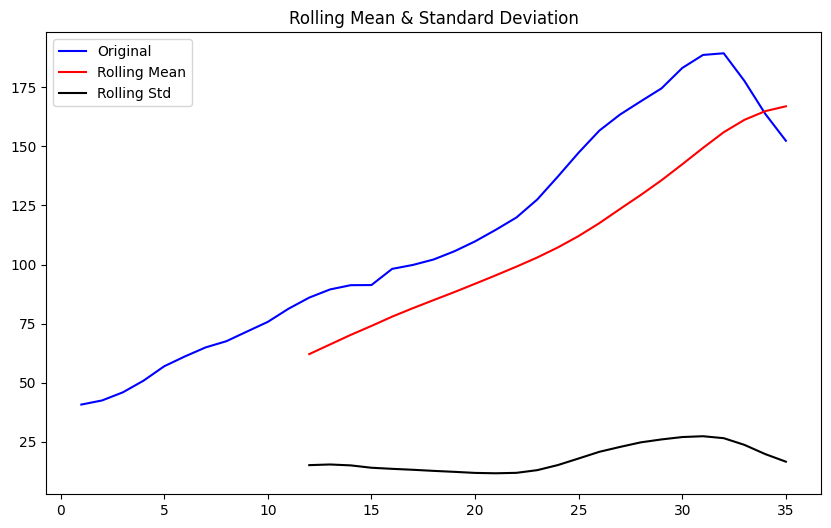

Résultats du test de Dickey-Fuller :
Test Statistic                  0.205506
p-value                         0.972569
#Lags Used                     10.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
Critical Value (5%)            -2.992216
Critical Value (10%)           -2.635747
dtype: float64
[[140.7875216  152.36375   ]
 [129.3888995  140.7875216 ]
 [118.45334036 129.3888995 ]
 [108.22941584 118.45334036]
 [ 98.92543999 108.22941584]]


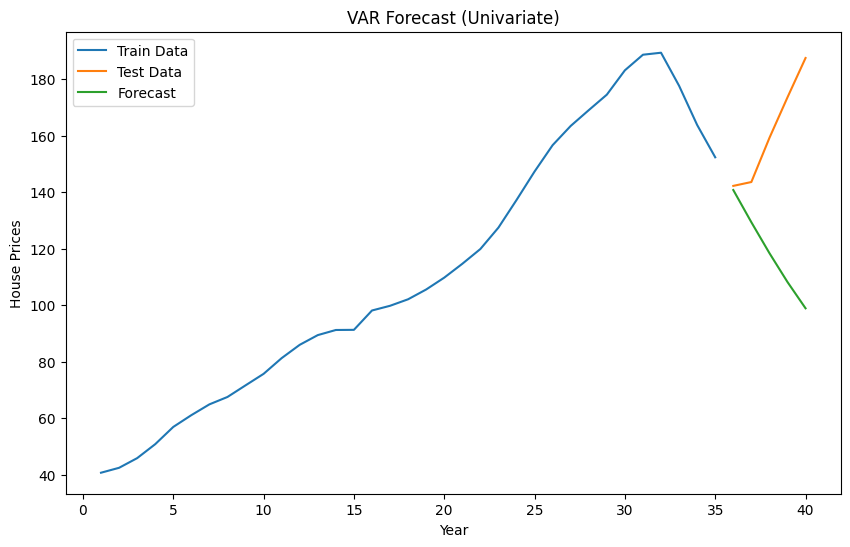

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.stattools import adfuller

# Charger les données
data = pd.read_excel('Atlanta.xlsx')

# Sélectionner uniquement les colonnes 'Year' et 'index_nsa'
data = data[['Year', 'index_nsa']]
price = data[['index_nsa']]

# Convertir la colonne 'Year' en datetime
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Définir la colonne 'Year' comme index
data.set_index('Year', inplace=True)

# Séparation des données en ensembles d'entraînement et de test
train = price.iloc[:-5] # Utiliser toutes les données sauf les 5 dernières pour l'entraînement
test = price.iloc[-5:] # Utiliser les 5 dernières données pour les tests

# Créer une DataFrame avec une seule colonne
train_multi = train.copy()
train_multi['index_nsa_lag1'] = train['index_nsa'].shift(1)  # Ajouter une variable lag

# Supprimer les lignes avec des valeurs manquantes
train_multi.dropna(inplace=True)

# Vérifier la stationnarité de la série temporelle
def test_stationarity(timeseries):
    # Calcul de la statistique de la moyenne mobile
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # Tracé de la statistique de la moyenne mobile
    plt.figure(figsize=(10, 6))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Test Dickey-Fuller
    print('Résultats du test de Dickey-Fuller :')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

test_stationarity(train_multi['index_nsa'])

# Ajustement du modèle VAR (univarié)
model = VAR(train_multi)
results = model.fit()

# Faire des prévisions
forecast = results.forecast(train_multi.values, steps=len(test)) # Prévoir sur la longueur des données de test

# Afficher les prévisions
print(forecast)

# Tracer les prévisions par rapport aux données de test
plt.figure(figsize=(10, 6))
plt.plot(train_multi.index, train_multi['index_nsa'], label='Train Data')
plt.plot(test.index, test['index_nsa'], label='Test Data')
plt.plot(test.index, forecast[:,0], label='Forecast')
plt.xlabel('Year')
plt.ylabel('House Prices')
plt.title('VAR Forecast')
plt.legend()
plt.show()
